In [49]:
import numpy as np
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
plt.rcParams['font.sans-serif']=['Microsoft Jhenghei']
plt.rcParams['axes.unicode_minus']=False

In [3]:
df = pd.read_csv("../data/traindrug.csv", encoding="utf8")

In [4]:
X = df.drop(labels=['再犯註記'], axis=1).values
y = df['再犯註記'].values

In [5]:
from collections import Counter

In [6]:
count = Counter(y)
count

Counter({0: 53906, 1: 11496})

In [16]:
class_counts = df['再犯註記'].value_counts()

Text(0.5, 0, '再犯註記(1:再犯，0:非再犯)')

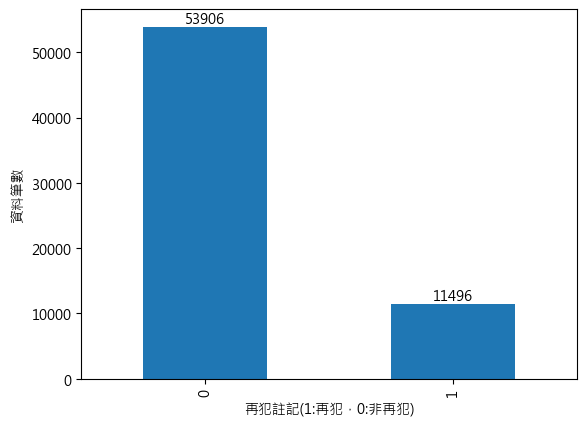

In [42]:
ax=class_counts.plot.bar()
ax.bar_label(ax.containers[0]) #顯示bar的資料數據 
ax.set_ylabel("資料筆數") #設定y軸標籤
ax.set_xlabel("再犯註記(1:再犯，0:非再犯)") #設定y軸標籤

In [61]:
mm = [RandomForestClassifier(),
      RandomForestClassifier(class_weight='balanced'),
     RandomForestClassifier(class_weight='balanced_subsample')]

In [51]:
#model = RandomForestClassifier()
model = RandomForestClassifier(class_weight='balanced')

In [52]:
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [53]:
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=CV, n_jobs=-1)

In [54]:
print('model: %s, Mean ROC AUC: %.3f' % (m, mean(scores)))

Mean ROC AUC: 0.762


In [62]:
for m in mm:
    model = m
    CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=CV, n_jobs=-1)
    print('model: %s, Mean ROC AUC: %.3f' % (m, mean(scores)))

model: RandomForestClassifier(), Mean ROC AUC: 0.762
model: RandomForestClassifier(class_weight='balanced'), Mean ROC AUC: 0.762
model: RandomForestClassifier(class_weight='balanced_subsample'), Mean ROC AUC: 0.762


In [64]:
for m in mm:
    model = m
    CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='precision', cv=CV, n_jobs=-1)
    print('model: %s, Mean ROC AUC: %.3f' % (m, mean(scores)))

model: RandomForestClassifier(), Mean ROC AUC: 0.588
model: RandomForestClassifier(class_weight='balanced'), Mean ROC AUC: 0.562
model: RandomForestClassifier(class_weight='balanced_subsample'), Mean ROC AUC: 0.560


In [66]:
for m in mm:
    model = m
    CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=CV, n_jobs=-1)
    print('model: %s, Mean ROC AUC: %.3f' % (m, mean(scores)))

model: RandomForestClassifier(), Mean ROC AUC: 0.838
model: RandomForestClassifier(class_weight='balanced'), Mean ROC AUC: 0.834
model: RandomForestClassifier(class_weight='balanced_subsample'), Mean ROC AUC: 0.835


In [67]:
model = XGBClassifier()
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=CV, n_jobs=-1)
print('model: %s, Mean ROC AUC: %.3f' % (m, mean(scores)))

model: RandomForestClassifier(class_weight='balanced_subsample'), Mean ROC AUC: 0.782


In [69]:
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X, y)
model = RandomForestClassifier()
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_res, y_res, scoring='roc_auc', cv=CV, n_jobs=-1)
print('model: %s, Mean ROC AUC: %.3f' % (m, mean(scores)))

model: RandomForestClassifier(class_weight='balanced_subsample'), Mean ROC AUC: 0.953
